In [1]:
import numpy as np
from preprocessing import ConstantLengthDataGenerator, plot
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
data_path = './data/concatenated'
X, y = np.load(f"{data_path}/X.npy", allow_pickle=True), np.load(f"{data_path}//y.npy")
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (60555,)
y shape: (60555, 1)


In [3]:
X[0]

0      -0.584754
1      -0.584754
2       1.730991
3      -0.584754
4      -0.584754
          ...   
1455   -0.584734
1456   -0.583729
1457   -0.578603
1458    1.732726
1459   -0.584734
Length: 1460, dtype: float64

In [4]:
y[0]

array(['ACSF1_9'], dtype='<U42')

In [5]:
generator = ConstantLengthDataGenerator(X, y, batch_size=8, max_length=128)

In [6]:
X_batch, y_batch = next(generator)
print(X_batch.shape)
X_batch

(8, 64)


array([[ 3.02    ,  3.018   ,  2.982   ,  2.734   ,  2.52    ,  2.57    ,
         2.438   ,  2.227   ,  2.176   ,  2.07    ,  2.01    ,  1.912   ,
         1.823   ,  1.716   ,  1.701   ,  1.651   ,  1.587   ,  1.49    ,
         1.439   ,  1.398   ,  1.373   ,  1.3     ,  1.245   ,  1.2     ,
         1.173   ,  1.139   ,  1.083   ,  1.027   ,  0.9634  ,  0.9536  ,
         0.9194  ,  0.854   ,  0.861   ,  0.8394  ,  0.8384  ,  0.7886  ,
         0.754   ,  0.7075  ,  0.6733  ,  0.668   ,  0.6206  ,  0.5957  ,
         0.5776  ,  0.575   ,  0.572   ,  0.5225  ,  0.4993  ,  0.4648  ,
         0.4658  ,  0.433   ,  0.4011  ,  0.3486  ,  0.3323  ,  0.3333  ,
         0.3237  ,  0.303   ,  0.3496  ,  0.2773  ,  0.2832  ,  0.2866  ,
         0.2515  ,  0.2479  ,  0.2316  ,  0.2247  ],
       [ 0.5674  ,  0.577   ,  0.5786  ,  0.5728  ,  0.56    ,  0.5415  ,
         0.519   ,  0.4924  ,  0.4631  ,  0.432   ,  0.398   ,  0.361   ,
         0.32    ,  0.2766  ,  0.2308  ,  0.1837  ,  0.1353

In [7]:
y_batch

array([['PigAirwayPressure_13'],
       ['WordSynonyms_2'],
       ['SonyAIBORobotSurface2_1'],
       ['Mallat_4'],
       ['AllGestureWiimoteZ_3'],
       ['PigArtPressure_12'],
       ['NonInvasiveFetalECGThorax2_26'],
       ['FiftyWords_39']], dtype='<U42')

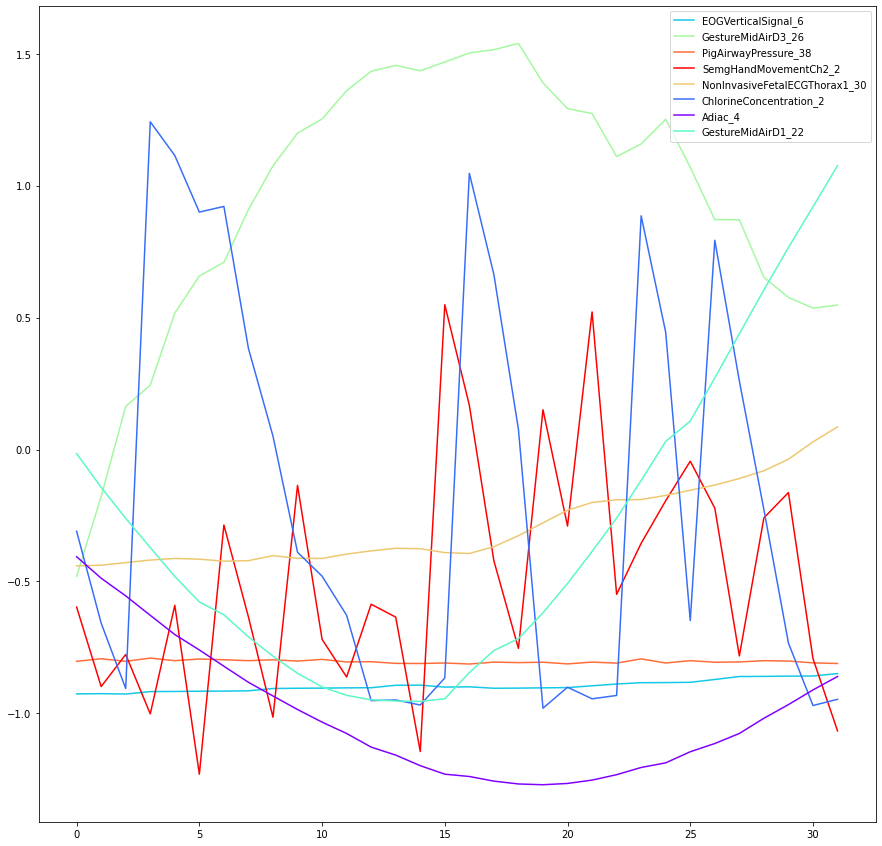

In [11]:
X_batch, y_batch = next(generator)
plot(X_batch, y_batch)
plt.legend(y_batch.ravel())

# Balanced classes

In [9]:
dummy_generator = ConstantLengthDataGenerator(X, y, batch_size=8, max_length=1)
classes = []
for i in range(5000):
    _, y = next(dummy_generator)
    classes += y.ravel().tolist()

counts = Counter(classes)
counts

Counter({'DodgerLoopDay_3': 40,
         'ShapesAll_55': 33,
         'Phoneme_5': 44,
         'NonInvasiveFetalECGThorax2_42': 34,
         'FaceAll_14': 39,
         'PigArtPressure_6': 40,
         'AllGestureWiimoteY_1': 39,
         'GestureMidAirD3_26': 33,
         'FiftyWords_22': 33,
         'ShakeGestureWiimoteZ_7': 33,
         'TwoPatterns_2': 43,
         'NonInvasiveFetalECGThorax2_1': 35,
         'CricketY_2': 36,
         'Mallat_3': 49,
         'GunPointOldVersusYoung_2': 31,
         'Meat_3': 41,
         'FiftyWords_34': 32,
         'FaceAll_2': 36,
         'FiftyWords_33': 43,
         'EOGHorizontalSignal_4': 32,
         'NonInvasiveFetalECGThorax1_9': 29,
         'PigArtPressure_32': 32,
         'GesturePebbleZ1_5': 31,
         'ChlorineConcentration_1': 29,
         'PigAirwayPressure_7': 36,
         'FreezerRegularTrain_2': 31,
         'Phoneme_31': 48,
         'ShapesAll_6': 31,
         'Phoneme_3': 33,
         'PigArtPressure_1': 37,
         '

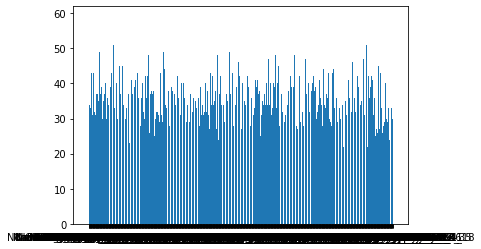

In [10]:
_ = plt.bar(*zip(*counts.items()))